# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ELCOT\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
# pip install --upgrade numexpr


# Task 1: Load and Inspect the Data 

In [140]:
df = pd.read_csv("heart.csv")

In [141]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [142]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [144]:
df['Target'] = df['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)

In [145]:
df['Target'].value_counts()

Target
0    164
1    139
Name: count, dtype: int64

# Task 2: Data Cleaning and Preprocessing

In [146]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
Target        0
dtype: int64

In [147]:
df['Ca'] = df['Ca'].fillna(df['Ca'].mean())

In [148]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          2
AHD           0
Target        0
dtype: int64

In [149]:
df['Thal'] = df['Thal'].fillna(df['Thal'].mode())

In [150]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          2
AHD           0
Target        0
dtype: int64

In [151]:
df = pd.get_dummies(df, columns=['RestECG','Thal'])

In [152]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])

In [153]:
#creating one new feature
df['exercise_induced_heart_stress'] = df['Oldpeak'] * df['Slope']

In [154]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,...,Ca,AHD,Target,RestECG_0,RestECG_1,RestECG_2,Thal_fixed,Thal_normal,Thal_reversable,exercise_induced_heart_stress
0,1,63,1,typical,0.757525,-0.264900,1,0.017197,0,2.3,...,0.0,No,0,False,False,True,True,False,False,6.9
1,2,67,1,asymptomatic,1.611220,0.760415,0,-1.821905,1,1.5,...,3.0,Yes,1,False,False,True,False,True,False,3.0
2,3,67,1,asymptomatic,-0.665300,-0.342283,0,-0.902354,1,2.6,...,2.0,Yes,1,False,False,True,False,False,True,5.2
3,4,37,1,nonanginal,-0.096170,0.063974,0,1.637359,0,3.5,...,0.0,No,0,True,False,False,False,True,False,10.5
4,5,41,0,nontypical,-0.096170,-0.825922,0,0.980537,0,1.4,...,0.0,No,0,False,False,True,False,True,False,1.4


# Task 3: Exploratory Data Analysis (EDA)

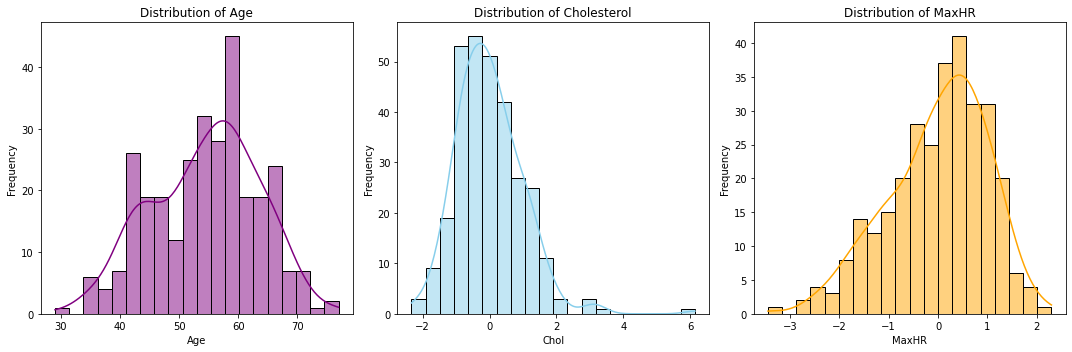

In [155]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='purple', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(df['Chol'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Cholesterol')
plt.xlabel('Chol')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(df['MaxHR'], kde=True, color='orange', bins=20)
plt.title('Distribution of MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

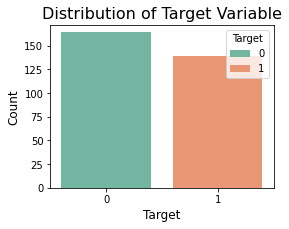

In [156]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Target',hue="Target", data=df, palette='Set2')

plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

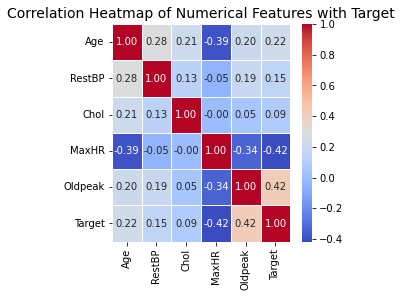

In [157]:
correlation_matrix = df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Target']].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features with Target', fontsize=14)
plt.show()

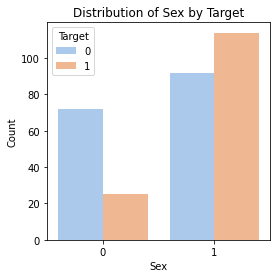

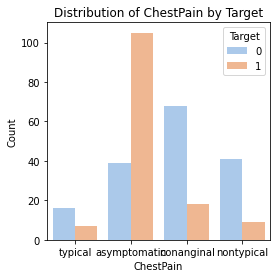

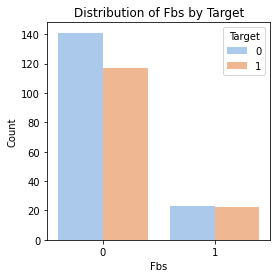

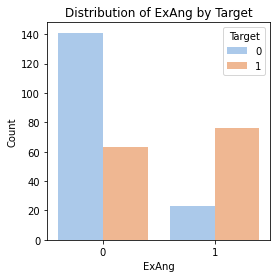

In [159]:
categorical_columns = ['Sex', 'ChestPain', 'Fbs', 'ExAng']


for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=col, hue='Target',palette='pastel', data=df)
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

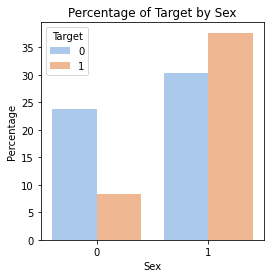

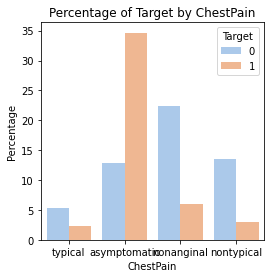

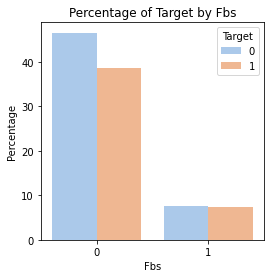

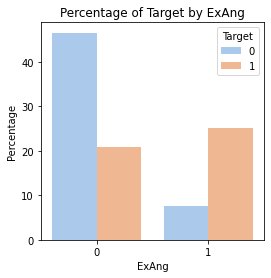

In [160]:
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.barplot(x=col, y='Target', hue='Target', data=df, estimator=lambda x: len(x) / len(df) * 100, palette='pastel')
    plt.title(f'Percentage of Target by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()

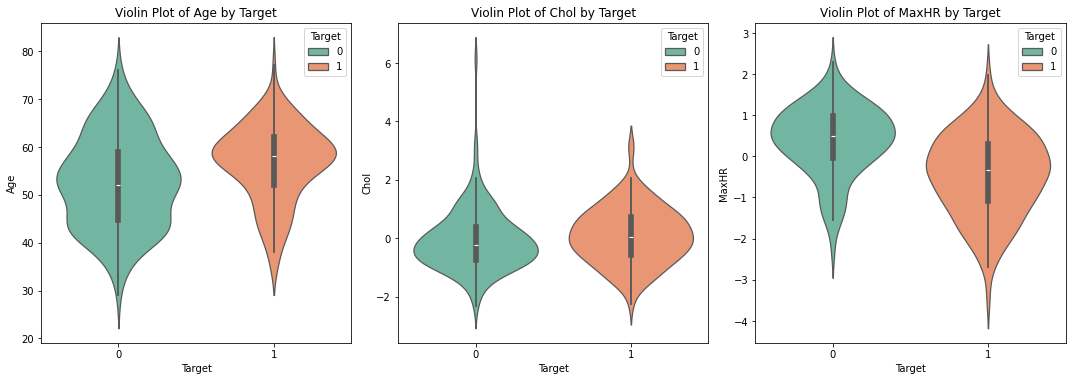

In [161]:
numerical_columns = ['Age', 'Chol', 'MaxHR']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  
    sns.violinplot(x='Target',hue='Target', y=col, data=df, palette='Set2')
    plt.title(f'Violin Plot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

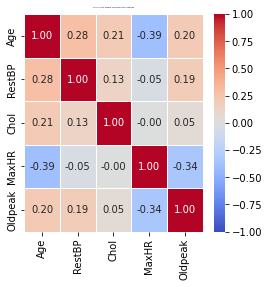

In [162]:
numerical_columns = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(4, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=2)
plt.show()

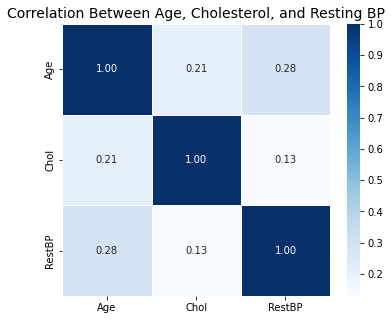

In [163]:
selected_features = ['Age', 'Chol', 'RestBP']
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(6, 5)) 
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Age, Cholesterol, and Resting BP', fontsize=14)
plt.show()

# Task 4: Aggregation and Insights

In [164]:
gender = df.groupby('Sex')['Target'].mean()
gender.value_counts

<bound method IndexOpsMixin.value_counts of Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64>

In [165]:
survival_by_chestpain = df.groupby('ChestPain')['Target'].mean()
survival_by_chestpain.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: Target, dtype: float64>

In [166]:
survival_by_max_heartrate = df.groupby('ChestPain')['Target'].max()
survival_by_max_heartrate.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    1
nonanginal      1
nontypical      1
typical         1
Name: Target, dtype: int64>

In [167]:
avg_target = df.groupby(['ChestPain', 'Target'])['Chol'].mean().reset_index()
avg_target.rename(columns={'Chol': 'Avg_Cholesterol'}, inplace=True)
avg_target.value_counts
 

<bound method DataFrame.value_counts of       ChestPain  Target  Avg_Cholesterol
0  asymptomatic       0        -0.026305
1  asymptomatic       1         0.111141
2    nonanginal       0        -0.027348
3    nonanginal       1        -0.148827
4    nontypical       0        -0.116270
5    nontypical       1         0.324065
6       typical       0        -0.325355
7       typical       1         0.135829>

# Task 5: Derive Medical Insights

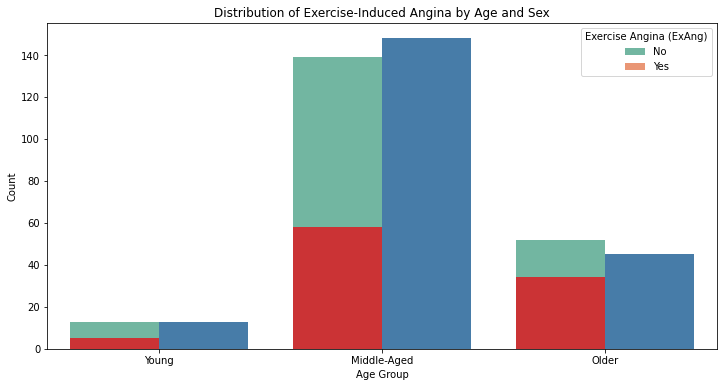

In [168]:
bins = [0, 40, 60, 100]
labels = ['Young', 'Middle-Aged', 'Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='ExAng', palette='Set2', 
              hue_order=[0, 1], dodge=True)


sns.countplot(data=df, x='AgeGroup', hue='Sex', palette='Set1', dodge=True)

plt.title('Distribution of Exercise-Induced Angina by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Exercise Angina (ExAng)', labels=['No', 'Yes'])
plt.show()

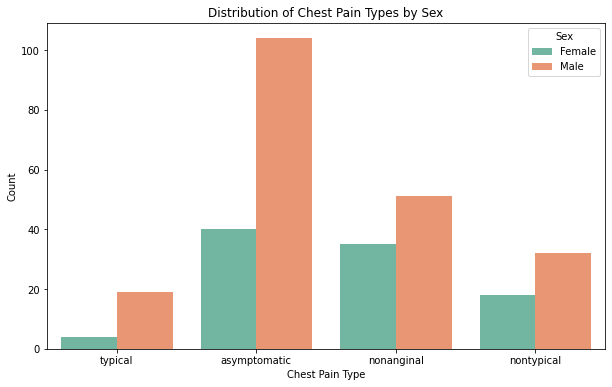

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPain', hue='Sex', palette='Set2')
plt.title('Distribution of Chest Pain Types by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

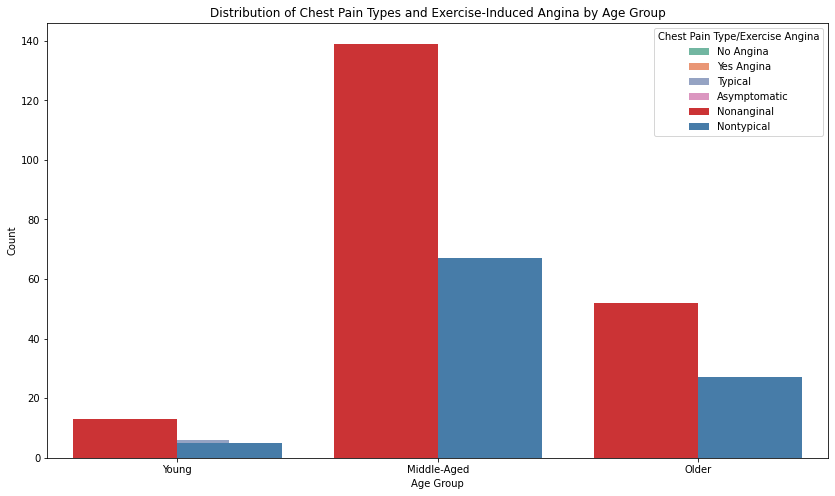

In [170]:
bins = [0, 40, 60, 100]
labels = ['Young', 'Middle-Aged', 'Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='AgeGroup', hue='ChestPain', palette='Set2', 
              hue_order=['typical', 'asymptomatic', 'nonanginal', 'nontypical'], dodge=True)


sns.countplot(data=df, x='AgeGroup', hue='ExAng', palette='Set1', dodge=True, 
              hue_order=[0, 1])

plt.title('Distribution of Chest Pain Types and Exercise-Induced Angina by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type/Exercise Angina', labels=['No Angina', 'Yes Angina', 'Typical', 'Asymptomatic', 'Nonanginal', 'Nontypical'])
plt.show()


In [173]:
grouped_data = df.groupby(['Age', 'ChestPain']).agg({
    'Chol': 'mean',
    'MaxHR': 'mean',
    'Oldpeak': 'mean',
    'ExAng': 'mean'
}).reset_index()

print(grouped_data)

     Age     ChestPain      Chol     MaxHR  Oldpeak     ExAng
0     29    nontypical -0.825922  2.294182      0.0  0.000000
1     34    nontypical -0.709849  1.856300      0.7  0.000000
2     34       typical -1.251525  1.068113      0.0  0.000000
3     35  asymptomatic -0.497047  0.279926      1.0  0.666667
4     35    nontypical -1.058069  1.068113      0.0  0.000000
..   ...           ...       ...       ...      ...       ...
103   71    nonanginal  0.354158 -0.858566      0.0  0.000000
104   71    nontypical  1.069944  0.542655      0.4  0.000000
105   74    nontypical  0.431540 -1.252659      0.2  1.000000
106   76    nonanginal -0.961341 -1.471600      1.1  0.000000
107   77  asymptomatic  1.108636  0.542655      0.0  1.000000

[108 rows x 6 columns]


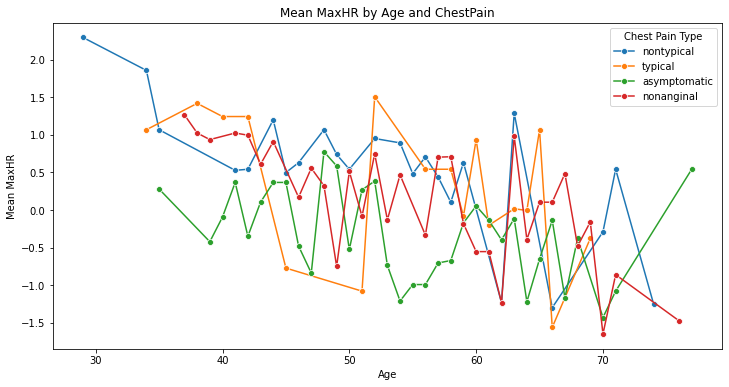

In [174]:

plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="MaxHR", hue="ChestPain", data=grouped_data, marker="o")
plt.title('Mean MaxHR by Age and ChestPain')
plt.xlabel('Age')
plt.ylabel('Mean MaxHR')
plt.legend(title='Chest Pain Type')
plt.show()

In [176]:
survival_rate_by_age_and_sex = df.groupby(['Age', 'Sex'])['Target'].mean().reset_index()
print(survival_rate_by_age_and_sex)

    Age  Sex    Target
0    29    1  0.000000
1    34    0  0.000000
2    34    1  0.000000
3    35    0  0.000000
4    35    1  0.666667
..  ...  ...       ...
68   70    1  0.750000
69   71    0  0.000000
70   74    0  0.000000
71   76    0  0.000000
72   77    1  1.000000

[73 rows x 3 columns]


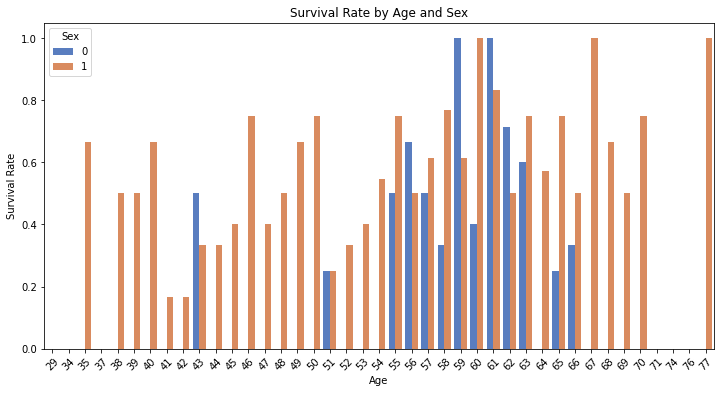

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Target', hue='Sex', data=survival_rate_by_age_and_sex, palette='muted')
plt.title('Survival Rate by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()

In [178]:
grouped_data = df.groupby('Target').agg({
    'ChestPain': lambda x: x.mode()[0],  
    'RestBP': 'mean',  
    'Chol': 'mean'     
}).reset_index()
print(grouped_data)

   Target     ChestPain    RestBP      Chol
0       0    nonanginal -0.138855 -0.078404
1       1  asymptomatic  0.163828  0.092506


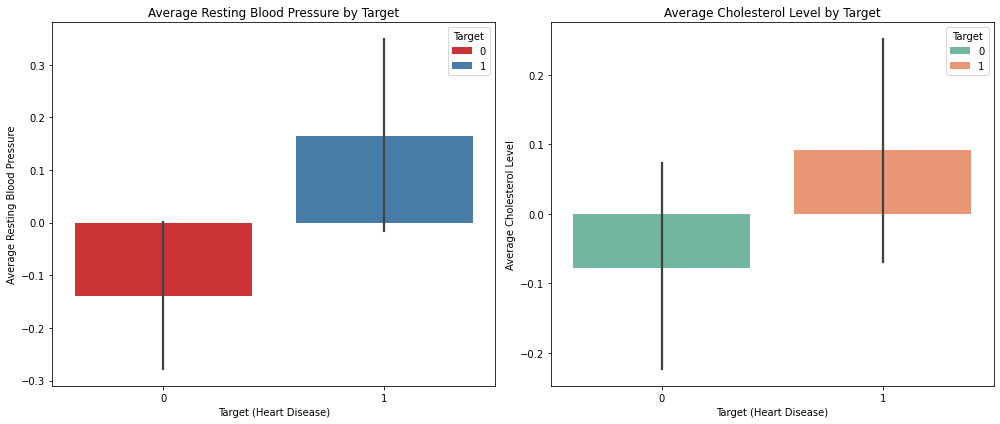

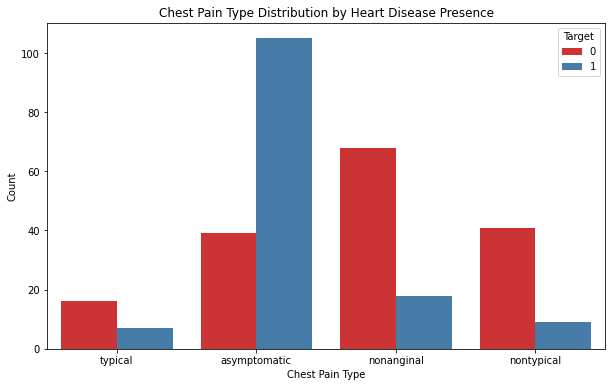

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Target', y='RestBP', hue="Target", data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Average Resting Blood Pressure by Target')
axes[0].set_xlabel('Target (Heart Disease)')
axes[0].set_ylabel('Average Resting Blood Pressure')

sns.barplot(x='Target', y='Chol',hue='Target', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Average Cholesterol Level by Target')
axes[1].set_xlabel('Target (Heart Disease)')
axes[1].set_ylabel('Average Cholesterol Level')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPain', hue='Target', data=df, palette='Set1')
plt.title('Chest Pain Type Distribution by Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

In [180]:
grouped_exang = df.groupby('ChestPain')['exercise_induced_heart_stress'].agg(['mean', 'sum', 'count'])
print(grouped_exang)

                  mean    sum  count
ChestPain                           
asymptomatic  2.859028  411.7    144
nonanginal    1.481395  127.4     86
nontypical    0.498000   24.9     50
typical       2.826087   65.0     23


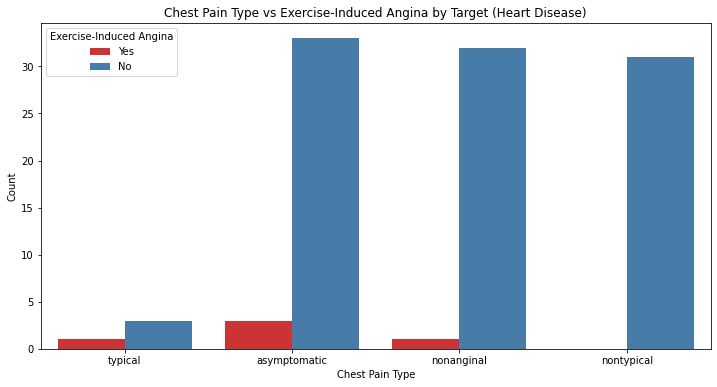

In [181]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ChestPain', hue='exercise_induced_heart_stress', data=df, palette='Set1', hue_order=[1, 0])
plt.title('Chest Pain Type vs Exercise-Induced Angina by Target (Heart Disease)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Exercise-Induced Angina', labels=['Yes', 'No'])
plt.show()


In [183]:
grouped_data = df.groupby([ 'ChestPain']).agg({'Age': ['mean', 'std', 'min', 'max']}).reset_index()
print(grouped_data)

      ChestPain        Age                   
                      mean        std min max
0  asymptomatic  55.722222   8.291410  35  77
1    nonanginal  53.697674   9.323051  37  76
2    nontypical  51.360000   9.512098  29  74
3       typical  55.869565  10.033147  34  69


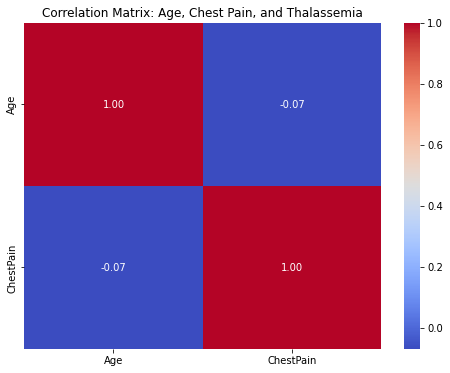

In [185]:
df_encoded = df.copy()
df_encoded['ChestPain'] = df_encoded['ChestPain'].map({
    'typical': 0, 
    'nonanginal': 1, 
    'asymptomatic': 2, 
    'nontypical': 3
})

correlation_matrix = df_encoded[['Age', 'ChestPain']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Age, Chest Pain, and Thalassemia')
plt.show()